# Observations and Insights

From the results gathered, this is how the drug Capomulin performed against other drug regimes over the course of 45 days

- The pie chart shows that the gender of mice were almost evently matched Male (51%) and Female (49%)
- The line graph shows that there is visible trend of decreasing tumor size
- Capomulin and Ramicane had similiar tumor size results, when looked at using central tendancies of measurement. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

num_mice = combined_results['Mouse ID'].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_results.loc[combined_results.duplicated(["Mouse ID", "Timepoint"], keep=False)]
indexMice = combined_results[combined_results['Mouse ID'] == 'g989'].index

duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_results = combined_results.drop(indexMice)

merged_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.

print(merged_results['Mouse ID'].nunique())


248


# Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_types = merged_results.groupby('Drug Regimen')

mean = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drug_summary = pd.DataFrame ({"Tumor Volume Mean" : mean,
                              "Tumor Volume Median" : median,
                              "Tumor Volume Variance" : variance,
                              "Tumor Volume Standard Deviation" : std_dev,
                              "Tumor Volume SEM" : sem})

drug_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

stats_summary = {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}
merged_results.groupby('Drug Regimen').agg(stats_summary)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

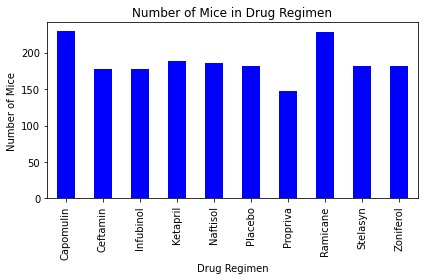

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

tot_treatment_mice = drug_types['Mouse ID'].count()
bar_pandas = tot_treatment_mice.plot(kind="bar", title="Number of Mice in Drug Regimen", facecolor="blue")
plt.ylabel("Number of Mice")
plt.tight_layout()


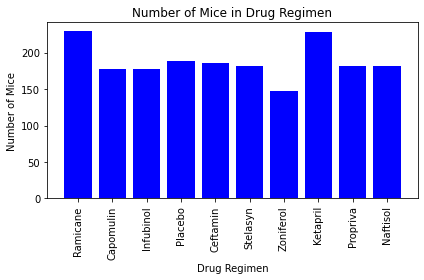

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_types_bar = merged_results['Drug Regimen'].unique()
tot_treatment_mice = drug_types['Mouse ID'].count()

x_axis = np.arange(len(drug_types_bar))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.bar (x_axis, tot_treatment_mice, color="blue",)
plt.xticks(tick_locations, drug_types_bar, rotation="vertical")
plt.title ("Number of Mice in Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()


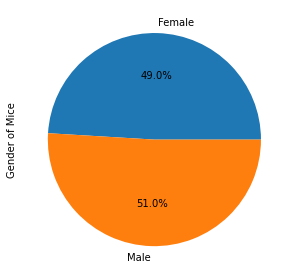

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = merged_results.groupby('Sex')['Sex'].count()
gender_pandas = mice_gender.plot(kind="pie", y="sex", autopct="%1.1f%%")
plt.ylabel("Gender of Mice")
plt.tight_layout()


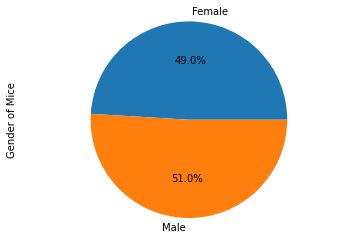

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = merged_results.groupby('Sex')['Sex'].count()
labels = ["Female", "Male"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%")
plt.ylabel("Gender of Mice")
plt.axis("equal")
plt.show()


# Quartiules, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_results.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_summary = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge = pd.merge(merged_results, last_timepoint_summary, on=['Mouse ID', 'Timepoint'])

new_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capm = []
tumor_rami = []
tumor_infu = []
tumor_ceft = []


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capo_df = new_merge.loc[new_merge['Drug Regimen'] == "Capomulin", :]

tumor_capo = capo_df['Tumor Volume (mm3)']

quartiles = tumor_capo.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
print(f"The lower quartile for tumor volume is {lowerq}")
print(f"The upper quartiles for tumor volume is {upperq}")
print(f"The interquartile for tumor volume is {iqr}")
print(f"Potential outliers for Capomulin are tumors with volume size between {lower_bound} and {upper_bound}")


The lower quartile for tumor volume is 32.37735684
The upper quartiles for tumor volume is 40.1592203
The interquartile for tumor volume is 7.781863460000004
Potential outliers for Capomulin are tumors with volume size between 20.70456164999999 and 51.83201549


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

rami_df = new_merge.loc[new_merge['Drug Regimen'] == "Ramicane", :]

tumor_rami = rami_df['Tumor Volume (mm3)']

quartiles = tumor_rami.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
           
print(f"The lower quartile for tumor volume is {lowerq}")
print(f"The upper quartiles for tumor volume is {upperq}")
print(f"The interquartile for tumor volume is {iqr}")    
print(f"Potential outliers for Ramicane are tumors with volume size between {lower_bound} and {upper_bound}")


The lower quartile for tumor volume is 31.56046955
The upper quartiles for tumor volume is 40.65900627
The interquartile for tumor volume is 9.098536719999998
Potential outliers for Ramicane are tumors with volume size between 17.912664470000003 and 54.30681135


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

infu_df = new_merge.loc[new_merge['Drug Regimen'] == "Infubinol", :]

tumor_infu = infu_df['Tumor Volume (mm3)']

quartiles = tumor_infu.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile for tumor volume is {lowerq}")
print(f"The upper quartiles for tumor volume is {upperq}")
print(f"The interquartile for tumor volume is {iqr}")
print(f"Potential outliers for Infubinol are tumors with volume size between {lower_bound} and {upper_bound}")


The lower quartile for tumor volume is 54.04860769
The upper quartiles for tumor volume is 65.52574285
The interquartile for tumor volume is 11.477135160000003
Potential outliers for Infubinol are tumors with volume size between 36.83290494999999 and 82.74144559000001


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

ceft_df = new_merge.loc[new_merge['Drug Regimen'] == "Ceftamin", :]

tumor_ceft = ceft_df['Tumor Volume (mm3)']

quartiles = tumor_ceft.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
print(f"The lower quartile for tumor volume is {lowerq}")
print(f"The upper quartiles for tumor volume is {upperq}")
print(f"The interquartile for tumor volume is {iqr}")    
print(f"Potential outliers for Ceftamin are tumors with volume size between {lower_bound} and {upper_bound}")


The lower quartile for tumor volume is 48.72207785
The upper quartiles for tumor volume is 64.29983003
The interquartile for tumor volume is 15.577752179999997
Potential outliers for Ceftamin are tumors with volume size between 25.355449580000002 and 87.66645829999999


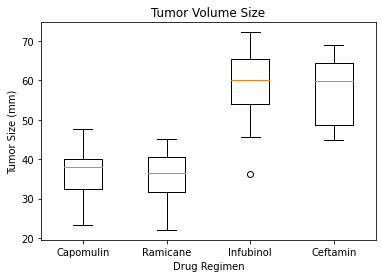

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_sizes = [tumor_capo, tumor_rami, tumor_infu, tumor_ceft]

fig, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Size')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Size (mm)')
ax1.boxplot(tumor_sizes, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


# Line and Scatter Plots

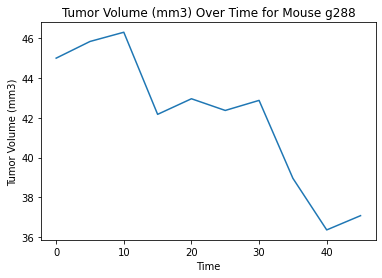

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Find mouse using capo_df

mouse_g288 = merged_results.loc[merged_results['Mouse ID'] == 'g288']
time = mouse_g288['Timepoint']
tumor_vol = mouse_g288['Tumor Volume (mm3)']

plt.plot(time, tumor_vol)
plt.title('Tumor Volume (mm3) Over Time for Mouse g288')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout
plt.show()


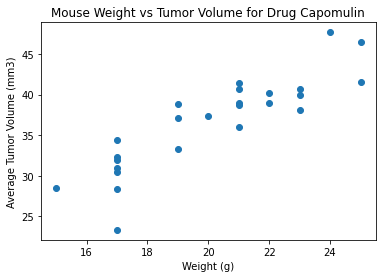

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = capo_df.groupby('Mouse ID')['Weight (g)'].unique()
avg_tumor_capo = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(mouse_weight, avg_tumor_capo)
plt.title('Mouse Weight vs Tumor Volume for Drug Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout
plt.show()


# Correlation and Regression

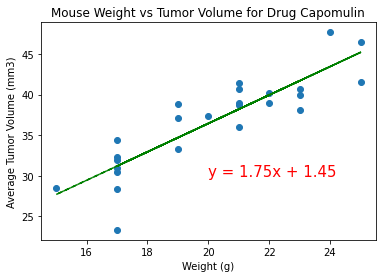

The correlation coefficient between mouse weight and average tumor volume for the drug Capomulin is 0.88


In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = mouse_weight.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capo)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(mouse_weight, avg_tumor_capo)
plt.plot(mouse_weight, regress_values, 'g--')
plt.annotate(line_eq, (20, 30), fontsize=15, color='red')
plt.title('Mouse Weight vs Tumor Volume for Drug Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the drug Capomulin is {round(st.pearsonr(mouse_weight, avg_tumor_capo)[0],2)}")
